In [1]:
#vengono importate le librerie necessarie

%matplotlib inline

import pickle
import pandas as pd 
import numpy as np 
from keras.layers import Input, Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.models import Model
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Using TensorFlow backend.


##### Definizione di funzioni ausiliarie per il preprocessing e per la visualizzazione 

In [2]:
#funzione per leggere i file

def load_data(file_name):
    df = pickle.load(open("{}".format(file_name),
                          "rb"))
    return df

In [3]:
#funzione per fare il reshape del dataset: prima viene letto il file, poi viene effettuata una conversione di tipo
#e standardizzato (dividendolo per 255) ed infine effettuato il reshape vero e proprio,trasformando l'immagine da 
#una matrice di 28 x 28 in un array da 784

def reshape_dataset(file_name):
    X = load_data(file_name)
    X = X.astype('float32') / 255.
    X= X.reshape(len(X),X.shape[1]*X.shape[2])

    return X

In [4]:
#funzione che serve per plottare i risultati della funzione di loss ed eventualmente dell'accuracy,
# sia del training set che del validation set

def plot_nn_results(network_history,accuracy=False,val_accuracy=False):
    
    if(accuracy==True and val_accuracy==True):
        
        plt.plot(network_history.history['val_accuracy'])
        plt.plot(network_history.history['accuracy'])
        plt.title('Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Validation','Train'], loc='lower right')
        plt.show()
        
    plt.plot(network_history.history['val_loss']) 
    plt.plot(network_history.history['loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Validation', 'Train'], loc='upper right') 
    plt.show()


In [5]:
# vengono letti i file di x_train e di y_train. Viene anche effettuata la reshape dei dati di x_train

X=reshape_dataset("/home/davide/Scrivania/Advanced Machine Learning/Assignment 2/x_train.obj")
y=load_data("/home/davide/Scrivania/Advanced Machine Learning/Assignment 2/y_train.obj")

In [6]:
# viene effettuato lo split del dataset in training e validation

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

#### CLASSIFICAZIONE TRAMITE RETE NEURALE 

In [7]:
#vengono scalate le classi del train set e del validation set, per poterle utilizzare correttamente in Keras

y_train=y_train-min(y_train)
y_val=y_val-min(y_val)

In [8]:
#viene effettuata la conversione nel formato one-hot encoding delle classi

y_train=np_utils.to_categorical(y_train,11)
y_val=np_utils.to_categorical(y_val,11)

In [9]:
#viene definito il modello di rete neurale per la classificazione

def build_neural_network():
    
    model=Sequential()
    model.add(Dense(512,input_shape=(784,),activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(11,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [10]:
#viene costruita la rete neurale

neural_network=build_neural_network()

In [11]:
# viene fatto il train del modello

neural_network_history=neural_network.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=50)

Train on 11200 samples, validate on 2800 samples
Epoch 1/50
11200/11200 [==============================] - 5s 454us/step - loss: 2.2071 - accuracy: 0.5255 - val_loss: 1.3046 - val_accuracy: 0.8000
Epoch 2/50
11200/11200 [==============================] - 5s 404us/step - loss: 1.3370 - accuracy: 0.7946 - val_loss: 0.9891 - val_accuracy: 0.8936
Epoch 3/50
11200/11200 [==============================] - 5s 403us/step - loss: 1.1192 - accuracy: 0.8423 - val_loss: 0.9298 - val_accuracy: 0.8825
Epoch 4/50
11200/11200 [==============================] - 5s 447us/step - loss: 1.0121 - accuracy: 0.8640 - val_loss: 0.8243 - val_accuracy: 0.9096
Epoch 5/50
11200/11200 [==============================] - 5s 467us/step - loss: 0.9563 - accuracy: 0.8693 - val_loss: 0.7940 - val_accuracy: 0.9121
Epoch 6/50
11200/11200 [==============================] - 5s 465us/step - loss: 0.8807 - accuracy: 0.8872 - val_loss: 0.7512 - val_accuracy: 0.9136
Epoch 7/50
11200/11200 [==============================] - 5s 41

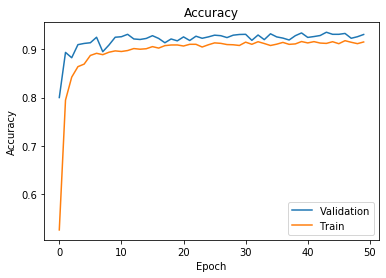

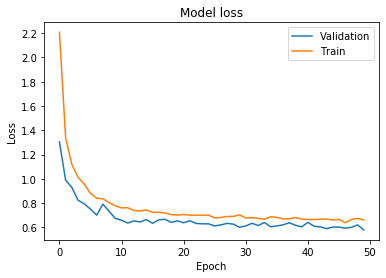

In [12]:
#vengono visualizzati i risultati del training del modello

plot_nn_results(neural_network_history,accuracy=True,val_accuracy=True)

In [13]:
#vengono convertite nuovamente le classi del training set in un array per poterle utilizzare correttamente nel 
#classification report

y_train_true=[]

for i in range(len(y_train)):
    y_train_true.append(np.argmax(y_train[i]))

In [14]:
#vengono convertite nuovamente le classi del vaditation set in un array per poterle utilizzare correttamente nel 
#classification report

y_val_true=[]

for i in range(len(y_val)):
    y_val_true.append(np.argmax(y_val[i]))

In [15]:
#vengono predette le classi del training set

y_train_pred_nn=neural_network.predict_classes(X_train)

In [16]:
#vengono predette le classi del validation set

y_val_pred_nn=neural_network.predict_classes(X_val)

In [17]:
#vengono stampati i classification reports sia del training set che del validation set

print("CLASSIFICATION REPORT FOR TRAINING SET:\n")
print(classification_report(y_train_true,y_train_pred_nn))
print("CLASSIFICATION REPORT FOR VALIDATION SET:\n")
print(classification_report(y_val_true,y_val_pred_nn))

CLASSIFICATION REPORT FOR TRAINING SET:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.95      0.98      0.97      1009
           2       0.98      0.96      0.97      1072
           3       0.99      0.99      0.99      1049
           4       0.98      0.98      0.98      1076
           5       0.93      0.96      0.94      1041
           6       0.91      0.93      0.92      1012
           7       0.99      0.98      0.98      1077
           8       0.97      0.96      0.96      1047
           9       0.95      0.93      0.94      1060
          10       1.00      0.96      0.98       727

    accuracy                           0.96     11200
   macro avg       0.97      0.96      0.96     11200
weighted avg       0.96      0.96      0.96     11200

CLASSIFICATION REPORT FOR VALIDATION SET:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     

#### COSTRUZIONE DELL' AUTOENCODER

In [18]:
#viene definita la funzione per costruire l'autoencoder

def build_autoencoder(encoding_dim):
    
    input_image=Input(shape=(784,))
    hidden_layer_1=Dense(512,activation='relu')(input_image)
    hidden_layer_2=Dense(256,activation='relu')(hidden_layer_1)
    hidden_layer_3=Dense(128,activation='relu')(hidden_layer_2)
    encoded=Dense(encoding_dim,activation='relu')(hidden_layer_3)
    hidden_layer_4=Dense(128,activation='relu')(encoded)
    hidden_layer_5=Dense(256,activation='relu')(hidden_layer_4)
    hidden_layer_6=Dense(512,activation='relu')(hidden_layer_5)
    decoded=Dense(784,activation='sigmoid')(hidden_layer_6)

    autoencoder=Model(input_image,decoded)
    autoencoder.compile(optimizer='adam',loss='mse')

    return autoencoder

In [19]:
#viene costruito l'autoencoder

autoencoder=build_autoencoder(64)

In [20]:
#training dell'autoencoder

autoencoder_history=autoencoder.fit(X_train,X_train,epochs=50,batch_size=32,validation_data=(X_val,X_val))

Train on 11200 samples, validate on 2800 samples
Epoch 1/50
11200/11200 [==============================] - 7s 621us/step - loss: 0.0591 - val_loss: 0.0365
Epoch 2/50
11200/11200 [==============================] - 7s 608us/step - loss: 0.0308 - val_loss: 0.0268
Epoch 3/50
11200/11200 [==============================] - 7s 608us/step - loss: 0.0235 - val_loss: 0.0219
Epoch 4/50
11200/11200 [==============================] - 7s 637us/step - loss: 0.0200 - val_loss: 0.0193
Epoch 5/50
11200/11200 [==============================] - 7s 641us/step - loss: 0.0179 - val_loss: 0.0179
Epoch 6/50
11200/11200 [==============================] - 7s 643us/step - loss: 0.0163 - val_loss: 0.0165
Epoch 7/50
11200/11200 [==============================] - 7s 644us/step - loss: 0.0152 - val_loss: 0.0161
Epoch 8/50
11200/11200 [==============================] - 7s 643us/step - loss: 0.0143 - val_loss: 0.0153
Epoch 9/50
11200/11200 [==============================] - 7s 625us/step - loss: 0.0137 - val_loss: 0.01

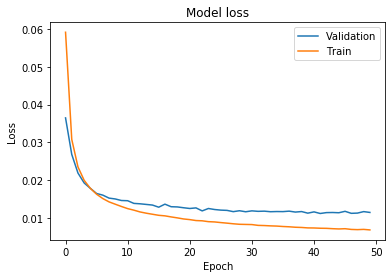

In [21]:
#visualizzazione della loss dell'autoencoder, sia sul training set che sul validation set

plot_nn_results(autoencoder_history,accuracy=False,val_accuracy=False)

In [22]:
#viene definita la funzione per ottenere i layers di encoding e di decoding, partendo dall'autoencoder definito
#precedentemente. La funzione prende in input l'autoencoder e gli indici dei propri layers.

def get_layers(autoencoder,layers_indeces):
    
    layers_list=[]
    
    for i in range(len(layers_indeces)):
        layers_list.append(autoencoder.layers[layers_indeces[i]])
        
    return layers_list    

In [23]:
#vengono presi i primi quattro Dense layers dell'autoencoder (layers di encoding)

encoder_layers=get_layers(autoencoder,[1,2,3,4])

In [24]:
#vengono presi gli ultimi quattro Dense layers dell'autoencoder (layers di decoding)

decoder_layers=get_layers(autoencoder,[-4,-3,-2,-1])

In [25]:
#dopo aver fissato le dimensioni dell'immagine di input e dell'immagine encodata, vengono definiti l'encoder e 
#il decoder

input_img=Input(shape=(784,))
encoded_img=Input(shape=(64,))

encoder=Model(input_img,encoder_layers[3](encoder_layers[2](encoder_layers[1]
                                                                (encoder_layers[0](input_img)))))
              
decoder=Model(encoded_img,decoder_layers[3](decoder_layers[2]
                                                (decoder_layers[1](decoder_layers[0](encoded_img)))))

In [26]:
#vengono prima encodate le immagini appartenenti al validation set (tramite l'utilizzo dell'encoder), 
#dopodichè vengono decodate (traimite l'utilizzo del decoder)

encoded_imgs=encoder.predict(X_val)
decoded_imgs=decoder.predict(encoded_imgs)

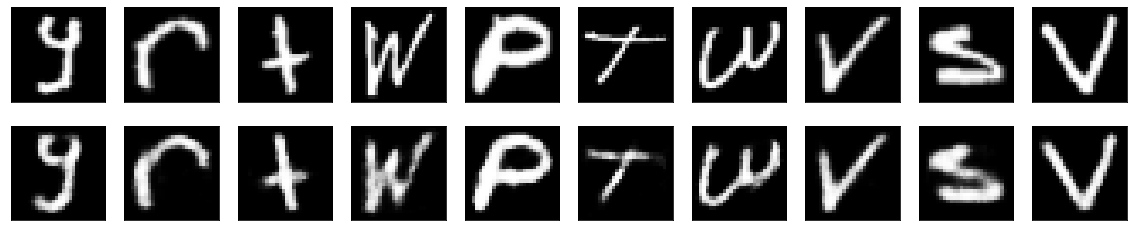

In [27]:
#vengono visualizzate le immagini: la prima riga corrisponde alle immagini "vere" del validation set, mentre
#la seconda riga corrisponde alle stesse immagini, però ricostruite dal decoder

n = 10 
plt.figure(figsize=(20, 4))

for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### CLASSIFICAZIONE TRAMITE AUTOENCODER

In [28]:
#viene definita la funzione per costruire il modello di classificazione partendo dai layers dell'encoder

def build_classification_model(encoding_dim):
    
    model=Sequential()
    model.add(Dense(512,input_shape=(784,),activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(encoding_dim,activation='relu'))
    
    model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.001)))
    
    model.add(Dense(11,activation='softmax'))
    
    return model

In [29]:
#viene costruito il modello di classificazione

autoencoder_model=build_classification_model(64)

In [30]:
#i primi quattro layers di questo modello devono avere gli stessi pesi dei layers dell'encoder, perciò vengono
#settati in anticipo

for i in range(0,4):
    autoencoder_model.layers[i].set_weights(autoencoder.layers[i+1].get_weights())

In [31]:
#sempre i primi quattro layers di questo modello non devono essere allenati durante il training del modello, perciò
#viene settato il loro attributo "trainable" a False

for layer in autoencoder_model.layers[0:4]:
    layer.trainable = False 

In [32]:
#viene stampato il summary del modello; notiamo che ci sono dei parametri non allenabili, corrispondenti ai 
#parametri dei primi quattro layers

autoencoder_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)               

In [33]:
#compilazione del modello

autoencoder_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#allenamento del modello

autoencoder_model_history=autoencoder_model.fit(X_train,y_train,validation_data=(X_val,y_val),
                                                batch_size=32,epochs=50)

Train on 11200 samples, validate on 2800 samples
Epoch 1/50
11200/11200 [==============================] - 1s 105us/step - loss: 2.0302 - accuracy: 0.6553 - val_loss: 1.3944 - val_accuracy: 0.7707
Epoch 2/50
11200/11200 [==============================] - 1s 93us/step - loss: 1.2470 - accuracy: 0.8003 - val_loss: 1.1410 - val_accuracy: 0.8086
Epoch 3/50
11200/11200 [==============================] - 1s 94us/step - loss: 1.0375 - accuracy: 0.8384 - val_loss: 0.9528 - val_accuracy: 0.8561
Epoch 4/50
11200/11200 [==============================] - 1s 102us/step - loss: 0.8940 - accuracy: 0.8654 - val_loss: 0.8553 - val_accuracy: 0.8689
Epoch 5/50
11200/11200 [==============================] - 1s 116us/step - loss: 0.8020 - accuracy: 0.8813 - val_loss: 0.8153 - val_accuracy: 0.8639
Epoch 6/50
11200/11200 [==============================] - 1s 101us/step - loss: 0.7392 - accuracy: 0.8897 - val_loss: 0.7367 - val_accuracy: 0.8882
Epoch 7/50
11200/11200 [==============================] - 1s 102u

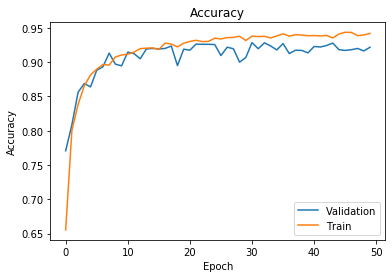

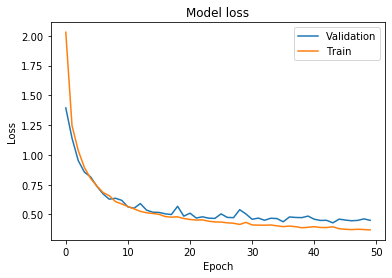

In [35]:
#visualizzazione dei risultati del modello: accuracy e loss, entrambi per training set e validation set

plot_nn_results(autoencoder_model_history,accuracy=True,val_accuracy=True)

In [36]:
#vengono predette le classi del training set

y_train_pred_ae=autoencoder_model.predict_classes(X_train)

In [37]:
#vengono predette le classi del validation set

y_val_pred_ae=autoencoder_model.predict_classes(X_val)

In [38]:
#vengono stampati i classification reports sia del training set che del validation set

print("CLASSIFICATION REPORT FOR TRAINING SET:\n")
print(classification_report(y_train_true,y_train_pred_ae))
print("CLASSIFICATION REPORT FOR VALIDATION SET:\n")
print(classification_report(y_val_true,y_val_pred_ae))

CLASSIFICATION REPORT FOR TRAINING SET:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1030
           1       0.93      0.95      0.94      1009
           2       0.96      0.92      0.94      1072
           3       1.00      0.96      0.98      1049
           4       0.98      0.93      0.95      1076
           5       0.88      0.97      0.92      1041
           6       0.94      0.88      0.91      1012
           7       0.95      0.97      0.96      1077
           8       0.97      0.93      0.95      1047
           9       0.90      0.93      0.92      1060
          10       0.91      0.97      0.94       727

    accuracy                           0.94     11200
   macro avg       0.94      0.94      0.94     11200
weighted avg       0.94      0.94      0.94     11200

CLASSIFICATION REPORT FOR VALIDATION SET:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     

In [39]:
#viene importato il file di test

X_test=reshape_dataset("/home/davide/Scrivania/Advanced Machine Learning/Assignment 2/x_test.obj")

In [40]:
#vengono predette le classi del test set

y_test_pred_ae=autoencoder_model.predict_classes(X_test)

In [41]:
#vengono scritte le predizioni delle classi del test set in un file di testo  

output_file = open("/home/davide/Scrivania/Advanced Machine Learning/Assignment 2/Davide_Sangalli_848013_score2.txt","w")

for i in y_test_pred_ae:
    output_file.write(str(i+16)+'\n')

output_file.close()